# Forecast Data Bitcoin USD

## Import Data

In [1]:
import pandas_datareader.data as web

In [2]:
dt_start = '2018-11-27'
dt_end   = '2021-11-27'
BTC = web.DataReader('BTC-USD', 'yahoo', start = dt_start, end = dt_end)
BTC

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-11-26,4107.140137,3643.919922,4015.070068,3779.129883,6.476900e+09,3779.129883
2018-11-27,3862.959961,3661.010010,3765.949951,3820.719971,5.998720e+09,3820.719971
2018-11-28,4385.899902,3822.469971,3822.469971,4257.419922,7.280280e+09,4257.419922
2018-11-29,4413.020508,4145.765137,4269.004395,4278.846680,6.503348e+09,4278.846680
2018-11-30,4322.976562,3942.822021,4289.088867,4017.268555,6.048017e+09,4017.268555
...,...,...,...,...,...,...
2021-11-23,57875.515625,55632.761719,56304.554688,57569.074219,3.748580e+10,57569.074219
2021-11-24,57803.066406,55964.222656,57565.851562,56280.425781,3.663557e+10,56280.425781
2021-11-25,59367.968750,57146.683594,57165.417969,57274.679688,3.428402e+10,57274.679688


In [3]:
BTC['Adj Close'].shift(1)

Date
2018-11-26             NaN
2018-11-27     3779.129883
2018-11-28     3820.719971
2018-11-29     4257.419922
2018-11-30     4278.846680
                  ...     
2021-11-23    56289.289062
2021-11-24    57569.074219
2021-11-25    56280.425781
2021-11-26    57274.679688
2021-11-27    53569.765625
Name: Adj Close, Length: 1094, dtype: float64

In [4]:
import pandas as pd
import numpy as np
returns = np.log(BTC['Adj Close'] / BTC['Adj Close'].shift(1)).dropna()
returns

Date
2018-11-27    0.010945
2018-11-28    0.108224
2018-11-29    0.005020
2018-11-30   -0.063081
2018-12-01    0.047970
                ...   
2021-11-23    0.022481
2021-11-24   -0.022639
2021-11-25    0.017512
2021-11-26   -0.066874
2021-11-27    0.022980
Name: Adj Close, Length: 1093, dtype: float64

In [5]:
df = BTC.reset_index()

In [6]:
data = np.log(df['Adj Close'] / df['Adj Close'].shift(1)).dropna()

In [7]:
data

1       0.010945
2       0.108224
3       0.005020
4      -0.063081
5       0.047970
          ...   
1089    0.022481
1090   -0.022639
1091    0.017512
1092   -0.066874
1093    0.022980
Name: Adj Close, Length: 1093, dtype: float64

In [694]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


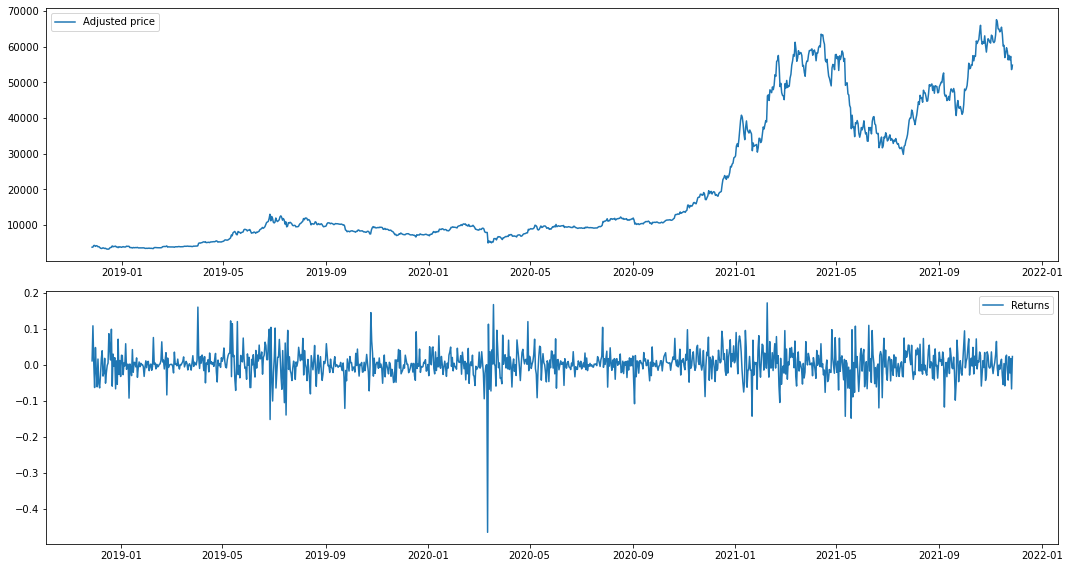

In [695]:
fig = plt.figure(figsize = (15, 8))
ax = fig.add_subplot(211)
ax.plot(BTC['Adj Close'], label = "Adjusted price")
plt.legend()
ax = fig.add_subplot(212)
fig.add_subplot(212).plot(returns, label = "Returns")
plt.legend()
plt.tight_layout()
plt.show()

## See Best ARIMA Model

In [699]:
#Import the required modules for vectors and matrix operations, data generation
import numpy as np
#Import the required modules for plot creation:
import matplotlib.pyplot as plt
#import the required modules for TimeSeries data generation:
import statsmodels.api as sm
#Import the required modules for test statistic calculation:
import statsmodels.stats as sm_stat
#Import the required modules for time series model estimation:
import statsmodels.tsa as smt
#Import Pandas
import pandas as pd

In [11]:
import arch as arch

In [701]:
def tsdisplay(y, figsize = (14, 8), title = "", lags = 20):
    tmp_data = pd.Series(y)
    fig = plt.figure(figsize = figsize)
    #Plot the time series
    tmp_data.plot(ax = fig.add_subplot(311), title = "$Time\ Series\ " + title + "$", legend = False)
    #Plot the ACF:
    sm.graphics.tsa.plot_acf(tmp_data, lags = lags, zero = False, ax = fig.add_subplot(323))
    plt.xticks(np.arange(1,  lags + 1, 1.0))
    #Plot the PACF:
    sm.graphics.tsa.plot_pacf(tmp_data, lags = lags, zero = False, ax = fig.add_subplot(324))
    plt.xticks(np.arange(1,  lags + 1, 1.0))
    #Plot the QQ plot of the data:
    sm.qqplot(tmp_data, line='s', ax = fig.add_subplot(325)) 
    plt.title("QQ Plot")
    #Plot the residual histogram:
    fig.add_subplot(326).hist(tmp_data, bins = 40, density=True, stacked=True)
    plt.title("Histogram")
    #Fix the layout of the plots:
    plt.tight_layout()
    plt.show()

In [702]:
def tsdiag(y, figsize = (14,8), title = "", lags = 10):
    #The data:
    tmp_data = pd.Series(y)
    #The Ljung-Box test results for the first k lags:
    tmp_acor = list(sm_stat.diagnostic.acorr_ljungbox(tmp_data, lags = lags, boxpierce = True))
    # get the p-values
    p_vals = pd.Series(tmp_acor[1])
    #Start the index from 1 instead of 0 (because Ljung-Box test is for lag values from 1 to k)
    p_vals.index += 1
    fig = plt.figure(figsize = figsize)
    #Plot the p-values:
    p_vals.plot(ax = fig.add_subplot(313), linestyle='', marker='o', title = "p-values for Ljung-Box statistic", legend = False)
    #Add the horizontal 0.05 critical value line
    plt.axhline(y = 0.05, color = 'blue', linestyle='--')
    # Annotate the p-value points above and to the left of the vertex
    x = np.arange(p_vals.size) + 1
    for X, Y, Z in zip(x, p_vals, p_vals):
        plt.annotate(round(Z, 4), xy=(X,Y), xytext=(-5, 5), ha = 'left', textcoords='offset points')
    plt.show()
    # Return the statistics:
    col_index = ["Ljung-Box: X-squared", "Ljung-Box: p-value", "Box-Pierce: X-squared", "Box-Pierce: p-value"]
    return pd.DataFrame(tmp_acor, index = col_index, columns = range(1, len(tmp_acor[0]) + 1))

In [703]:
# Suppress matplotlib's annoying deprecation warning
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore", category = matplotlib.cbook.mplDeprecation)

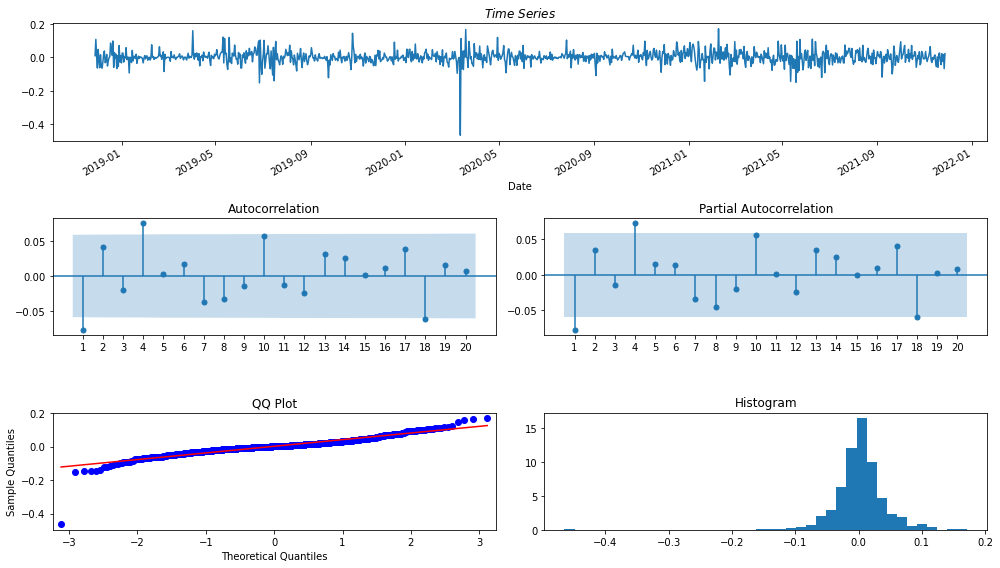

In [704]:
tsdisplay(returns)

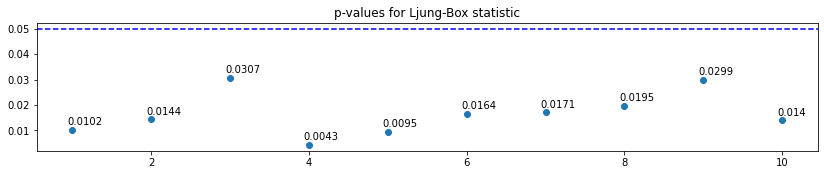

,1,2,3,4,5,6,7,8,9,10
Ljung-Box: X-squared,6.598802,8.482149,8.898901,15.213537,15.220507,15.547832,17.050190,18.234422,18.487381,22.228957
Ljung-Box: p-value,0.010205,0.014392,0.030666,0.004278,0.009461,0.016398,0.017075,0.019536,0.029922,0.013980
Box-Pierce: X-squared,6.580723,8.457190,8.872039,15.152075,15.159000,15.483934,16.973943,18.147360,18.397778,22.098351
Box-Pierce: p-value,0.010309,0.014573,0.031041,0.004396,0.009704,0.016809,0.017565,0.020148,0.030829,0.014611


In [705]:
tsdiag(returns)

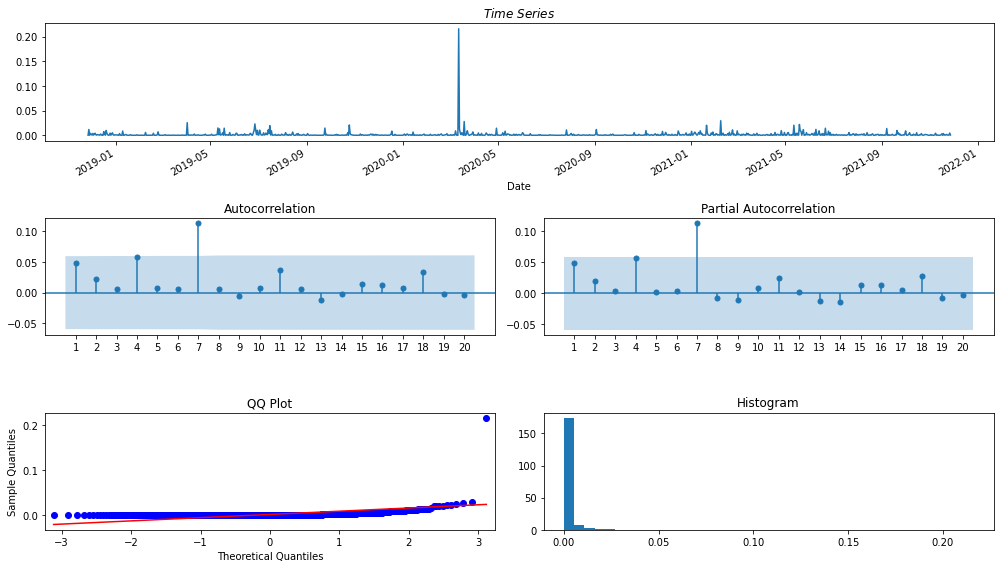

In [706]:
tsdisplay(returns**2)

In [707]:
warnings.filterwarnings("ignore", category = FutureWarning)
warnings.filterwarnings("ignore", category = RuntimeWarning)
warnings.filterwarnings("ignore", category = sm.tools.sm_exceptions.HessianInversionWarning)
warnings.filterwarnings("ignore", category = sm.tools.sm_exceptions.ConvergenceWarning)

In [708]:
# Specify the best AIC - default is infinite - so anything lower is better
best_aic = np.inf
# Specify the best order
best_order = None
# Specify the best model
best_mdl = None
# Loop through different (p, q) combinations, starting from ARMA(0, 0), to ARMA(1, 1)
pq_rng = range(2) # range(5) would be [0,1,2,3,4]
for i in pq_rng:
    for j in pq_rng:
        try:
            #print("Fitting an ARMA(" + str(i), ", " + str(j) + ") model")
            tmp_mdl = smt.api.ARIMA(returns, order = (i,0,j)).fit(method = 'mle', trend = 'c')
            tmp_aic = tmp_mdl.aic
            if tmp_aic < best_aic:
                best_aic = tmp_aic
                best_order = (i, 0, j)
                best_mdl = tmp_mdl
                print("Fitted an ARMA(" + str(i), ", " + str(j) + ") model - it was better")
            else:
                print("Fitted an ARMA(" + str(i), ", " + str(j) + ") model - it was worse")
        except: continue

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Fitted an ARMA(0 , 0) model - it was better
Fitted an ARMA(0 , 1) model - it was better


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Fitted an ARMA(1 , 0) model - it was better
Fitted an ARMA(1 , 1) model - it was better


In [709]:
best_aic

-3954.0917548998054

In [710]:
print(best_mdl.summary().tables[1])

                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0024      0.001      2.123      0.034       0.000       0.005
ar.L1.Adj Close    -0.7571      0.152     -4.992      0.000      -1.054      -0.460
ma.L1.Adj Close     0.6935      0.167      4.145      0.000       0.366       1.021


In [711]:
mdl_auto = sm.tsa.stattools.arma_order_select_ic(returns, ic = 'bic', trend = 'c', max_ar = 4, max_ma = 4)

In [712]:
print(mdl_auto)

{'bic':              0            1            2            3            4
0 -3937.797018 -3936.934182 -3931.466217 -3924.553183 -3924.443651
1 -3937.396816 -3934.105029 -3927.334376 -3920.353249 -3917.512953
2 -3931.801022 -3927.330566 -3920.581048 -3914.322902 -3911.745295
3 -3925.011850 -3920.370561 -3920.828551 -3911.979823 -3906.055926
4 -3923.801436 -3917.063866 -3912.387311 -3907.563772 -3899.631615, 'bic_min_order': (0, 0)}


# Checking for  ARCH  effects

In [713]:
resids = best_mdl.resid

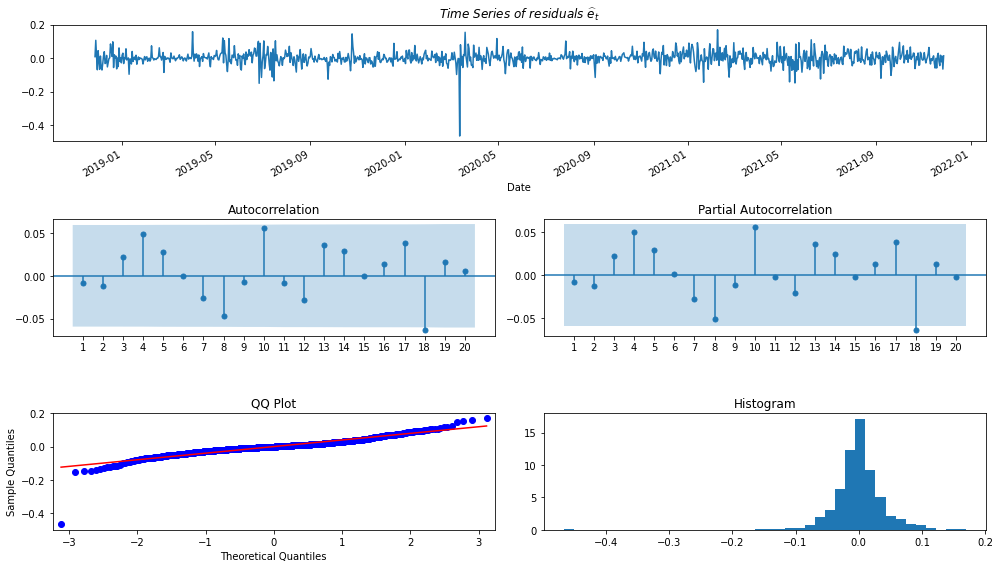

In [714]:
tsdisplay(resids, title = "of\ residuals\ \widehat{e}_t")

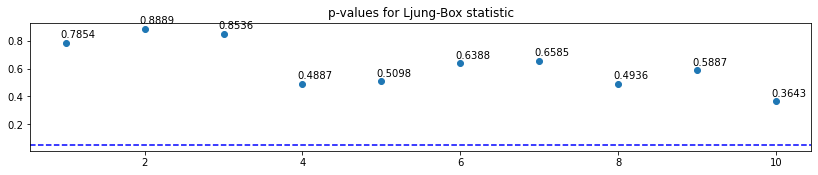

,1,2,3,4,5,6,7,8,9,10
Ljung-Box: X-squared,0.074151,0.235514,0.782596,3.429462,4.280004,4.280011,5.011767,7.405665,7.465948,10.914007
Ljung-Box: p-value,0.785387,0.888912,0.853625,0.488685,0.509846,0.638841,0.658527,0.493562,0.588726,0.364257
Box-Pierce: X-squared,0.073947,0.234721,0.779305,3.411668,4.256772,4.256780,4.982521,7.354557,7.414234,10.824506
Box-Pierce: p-value,0.785674,0.889264,0.854410,0.491436,0.513070,0.641971,0.662096,0.498906,0.594075,0.371353


In [715]:
tsdiag(resids)

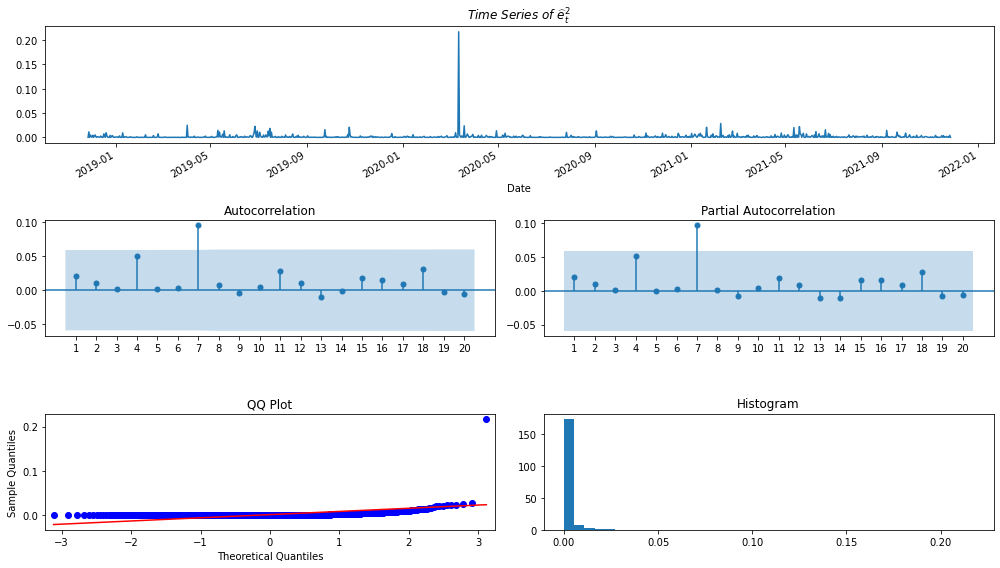

In [716]:
tsdisplay(resids**2, title = "of\ \widehat{e}_t^2")

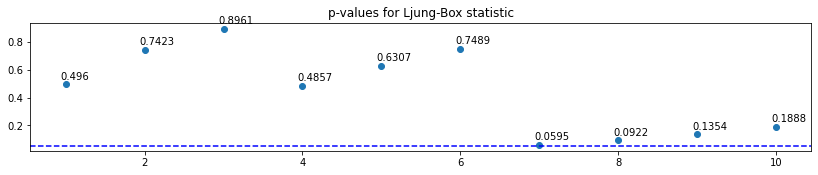

,1,2,3,4,5,6,7,8,9,10
Ljung-Box: X-squared,0.463436,0.595973,0.601402,3.448863,3.451428,3.463227,13.562806,13.620924,13.646949,13.665590
Ljung-Box: p-value,0.496023,0.742311,0.896111,0.485696,0.630750,0.748856,0.059527,0.092197,0.135450,0.188799
Box-Pierce: X-squared,0.462166,0.594219,0.599623,3.431482,3.434030,3.445743,13.462312,13.519899,13.545663,13.564099
Box-Pierce: p-value,0.496613,0.742962,0.896519,0.488373,0.633392,0.751174,0.061614,0.095170,0.139430,0.193819


In [717]:
tsdiag(resids**2)

# Model ARCH-GARCH

### ARCH(1)

In [718]:
mdl_arch = arch.univariate.ConstantMean(returns)

In [719]:
mdl_arch.volatility = arch.univariate.ARCH(1)

In [720]:
mdl_arch.distribution = arch.univariate.Normal()

In [721]:
mdl_arch_fit = mdl_arch.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 3934991.7627916057
Iteration:      2,   Func. Count:     15,   Neg. LLF: -1218.6728912719932
Iteration:      3,   Func. Count:     22,   Neg. LLF: -1975.6302588720523
Iteration:      4,   Func. Count:     27,   Neg. LLF: -1972.669082635782
Iteration:      5,   Func. Count:     32,   Neg. LLF: -1975.2721281514873
Iteration:      6,   Func. Count:     37,   Neg. LLF: -1978.8701777598994
Iteration:      7,   Func. Count:     41,   Neg. LLF: -1978.8839060223781
Iteration:      8,   Func. Count:     45,   Neg. LLF: -1978.8845618585483
Iteration:      9,   Func. Count:     49,   Neg. LLF: -1978.884566710511
Iteration:     10,   Func. Count:     52,   Neg. LLF: -1978.8845667105738
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1978.884566710511
            Iterations: 10
            Function evaluations: 52
            Gradient evaluations: 10


C:\Users\Dell\anaconda3\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001575. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [722]:
print(mdl_arch_fit.summary())

                      Constant Mean - ARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                1978.88
Distribution:                  Normal   AIC:                          -3951.77
Method:            Maximum Likelihood   BIC:                          -3936.78
                                        No. Observations:                 1093
Date:                Mon, Nov 29 2021   Df Residuals:                     1092
Time:                        01:26:44   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         2.3673e-03  1.190e-03      1.990  4.664e-02 [3.

In [723]:
print(mdl_arch_fit.params)

mu          0.002367
omega       0.001525
alpha[1]    0.030154
Name: params, dtype: float64


In [724]:
print(pd.DataFrame([mdl_arch_fit.aic, mdl_arch_fit.bic], index = ["AIC", "BIC"], columns = ["ARCH"]).T)

              AIC          BIC
ARCH -3951.769133 -3936.779089


### GARCH (1,1)

In [725]:
mdl_garch = arch.univariate.ConstantMean(returns)
mdl_garch.volatility = arch.univariate.GARCH(1, 0, 1)
mdl_garch.distribution = arch.univariate.Normal()

In [726]:
mdl_garch_fit = mdl_garch.fit()

C:\Users\Dell\anaconda3\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001575. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      6,   Neg. LLF: 12748574.417664772
Iteration:      2,   Func. Count:     17,   Neg. LLF: 33714.71510656382
Iteration:      3,   Func. Count:     27,   Neg. LLF: 142564713.85522258
Iteration:      4,   Func. Count:     38,   Neg. LLF: 1489.481720166737
Iteration:      5,   Func. Count:     47,   Neg. LLF: 278073716.35277194
Iteration:      6,   Func. Count:     58,   Neg. LLF: 2085.2078853389094
Iteration:      7,   Func. Count:     67,   Neg. LLF: 7016.946155334908
Iteration:      8,   Func. Count:     76,   Neg. LLF: -1754.964396667419
Iteration:      9,   Func. Count:     82,   Neg. LLF: -1844.712229475301
Iteration:     10,   Func. Count:     88,   Neg. LLF: -1995.7777071279938
Iteration:     11,   Func. Count:     95,   Neg. LLF: -2004.3217206105367
Iteration:     12,   Func. Count:    101,   Neg. LLF: -2009.878166679247
Iteration:     13,   Func. Count:    107,   Neg. LLF: -2009.9031866471423
Iteration:     14,   Func. Count:    112,   Neg. LL

In [727]:
print(mdl_garch_fit.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                2009.90
Distribution:                  Normal   AIC:                          -4011.81
Method:            Maximum Likelihood   BIC:                          -3991.82
                                        No. Observations:                 1093
Date:                Mon, Nov 29 2021   Df Residuals:                     1092
Time:                        01:26:49   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         3.2154e-03  1.245e-03      2.582  9.827e-03 [7.

In [728]:
print(pd.DataFrame([mdl_garch_fit.aic, mdl_garch_fit.bic], index = ["AIC", "BIC"], columns = ["GARCH"]).T)

               AIC          BIC
GARCH -4011.807185 -3991.820459


### AR(1)−GARCH(1,1) 

In [729]:
mdl_ar_garch = arch.univariate.ARX(returns, lags = 1)

In [730]:
mdl_ar_garch.volatility = arch.univariate.GARCH(1, 0, 1)

In [731]:
mdl_ar_garch.distribution = arch.univariate.Normal()

In [732]:
mdl_ar_garch_fit = mdl_ar_garch.fit()

C:\Users\Dell\anaconda3\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001567. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      7,   Neg. LLF: 496429869.12382525
Iteration:      2,   Func. Count:     19,   Neg. LLF: 206766.25604289141
Iteration:      3,   Func. Count:     30,   Neg. LLF: 98.37713800643195
Iteration:      4,   Func. Count:     40,   Neg. LLF: 2286676631.4466667
Iteration:      5,   Func. Count:     52,   Neg. LLF: 2021.5627201093366
Iteration:      6,   Func. Count:     62,   Neg. LLF: 3043845695297.8794
Iteration:      7,   Func. Count:     73,   Neg. LLF: -1511.864788651556
Iteration:      8,   Func. Count:     81,   Neg. LLF: -1937.4114443846076
Iteration:      9,   Func. Count:     88,   Neg. LLF: -1998.731860195328
Iteration:     10,   Func. Count:     95,   Neg. LLF: -1847.2421301821828
Iteration:     11,   Func. Count:    103,   Neg. LLF: -2009.7332370525446
Iteration:     12,   Func. Count:    110,   Neg. LLF: -1991.5394123416845
Iteration:     13,   Func. Count:    117,   Neg. LLF: -2009.9742820242718
Iteration:     14,   Func. Count:    123,   Neg

In [733]:
print(mdl_ar_garch_fit.summary())

                           AR - GARCH Model Results                           
Dep. Variable:              Adj Close   R-squared:                       0.006
Mean Model:                        AR   Adj. R-squared:                  0.005
Vol Model:                      GARCH   Log-Likelihood:                2009.97
Distribution:                  Normal   AIC:                          -4009.95
Method:            Maximum Likelihood   BIC:                          -3984.97
                                        No. Observations:                 1092
Date:                Mon, Nov 29 2021   Df Residuals:                     1090
Time:                        01:26:59   Df Model:                            2
                                  Mean Model                                  
                   coef    std err          t      P>|t|      95.0% Conf. Int.
------------------------------------------------------------------------------
Const        3.3594e-03  1.335e-03      2.516  1.187

In [734]:
np.round(mdl_ar_garch_fit.params, 4)

Const           0.0034
Adj Close[1]   -0.0700
omega           0.0001
alpha[1]        0.0941
beta[1]         0.8312
Name: params, dtype: float64

In [735]:
print(pd.DataFrame([mdl_ar_garch_fit.aic, mdl_ar_garch_fit.bic], index = ["AIC", "BIC"], columns = ["AR-GARCH"]).T)

                  AIC          BIC
AR-GARCH -4009.949117 -3984.970286


In [736]:
print(pd.DataFrame([mdl_ar_garch_fit.aic - mdl_garch_fit.aic, mdl_ar_garch_fit.bic - mdl_garch_fit.bic], index = ["AIC", "BIC"], columns = ["Difference"]).T)

                 AIC       BIC
Difference  1.858068  6.850173


# Model residual checking

### ARCH(1)

In [737]:
std_resid = mdl_arch_fit.resid / mdl_arch_fit.conditional_volatility

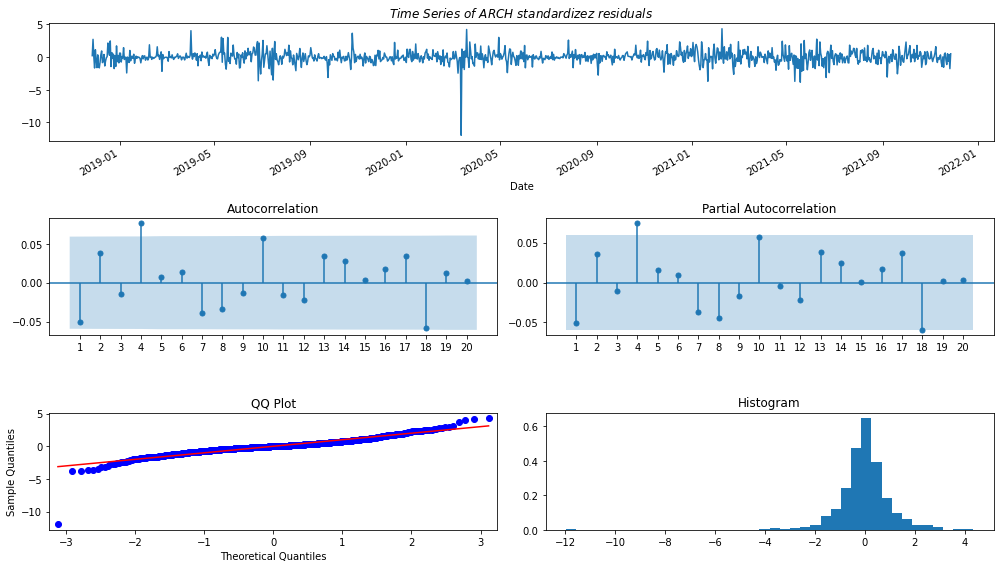

In [738]:
tsdisplay(std_resid, title = 'of\ ARCH\ standardizez\ residuals')

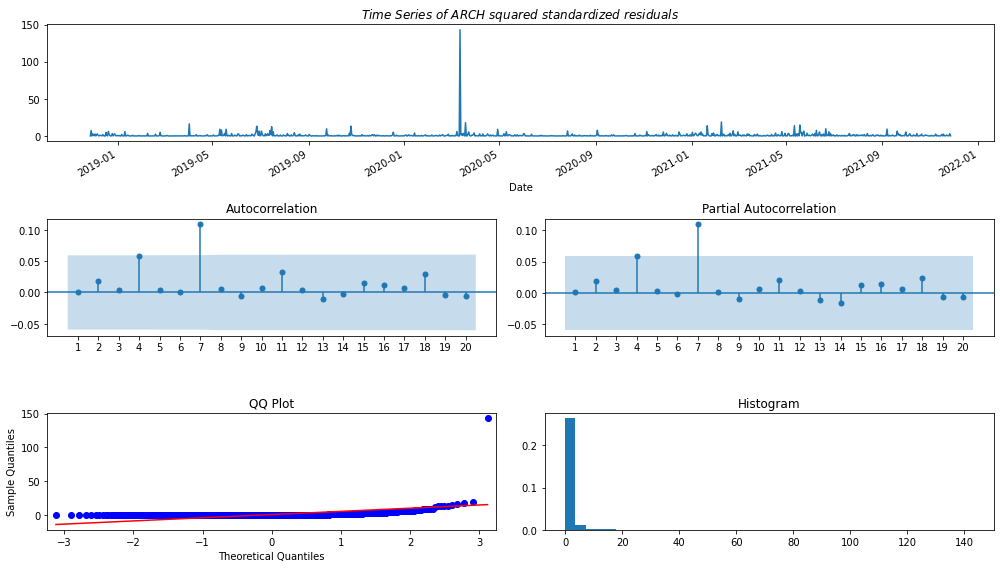

In [739]:
tsdisplay(std_resid**2, title = 'of\ ARCH\ squared\ standardized\ residuals')

### GARCH(1)

In [740]:
std_resid = mdl_garch_fit.resid / mdl_garch_fit.conditional_volatility

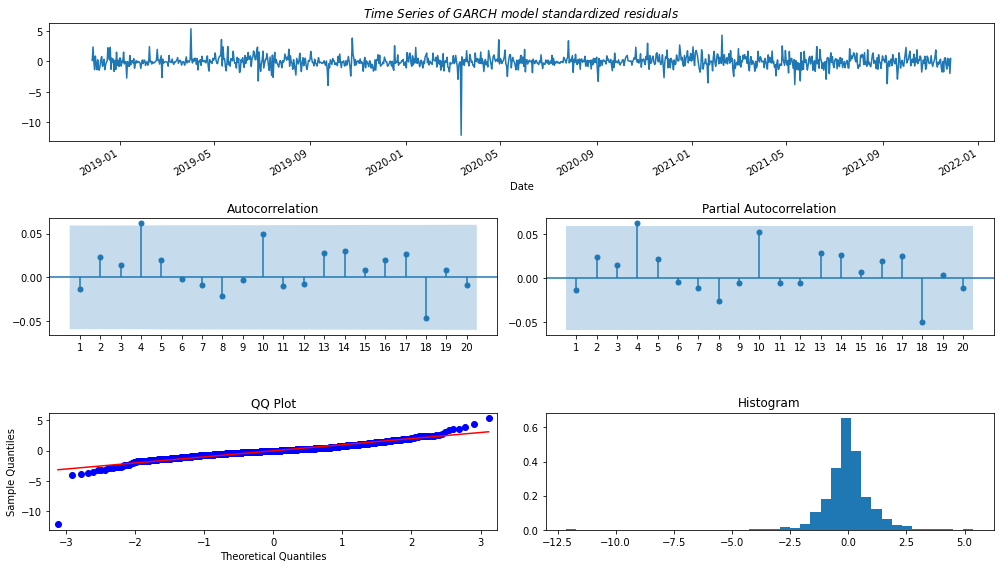

In [741]:
tsdisplay(std_resid, title = 'of\ GARCH\ model\ standardized\ residuals')

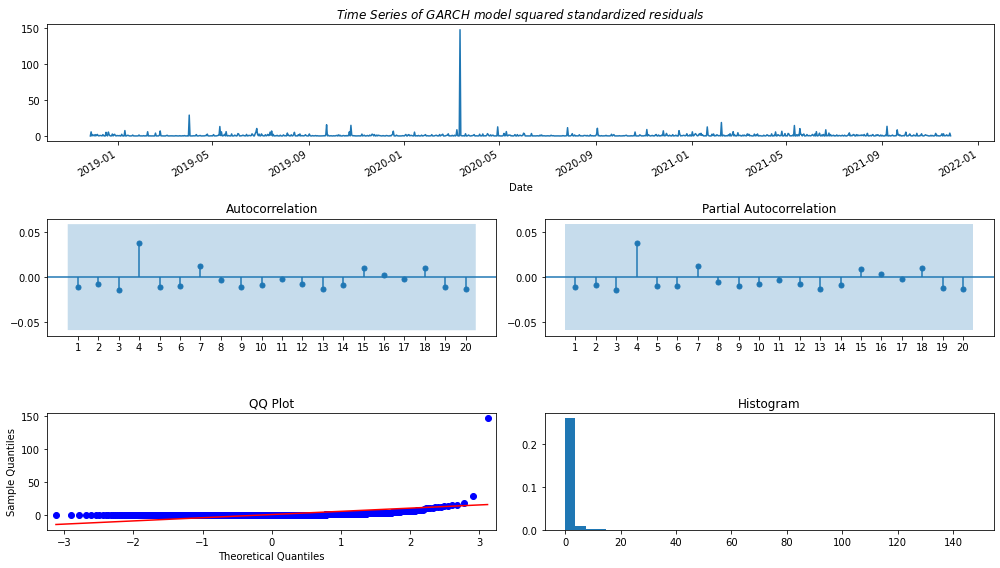

In [742]:
tsdisplay(std_resid**2, title = 'of\ GARCH\ model\ squared\ standardized\ residuals')

# Forecasting

In [743]:
mdl_forcs = mdl_garch_fit.forecast(horizon = 1)

In [744]:
mdl_forcs.mean.tail()

,h.1
Date,
2021-11-23,NaN
2021-11-24,NaN
2021-11-25,NaN
2021-11-26,NaN
2021-11-27,0.003215


In [745]:
forc_mean = pd.Series(mdl_forcs.mean.dropna().squeeze())

In [746]:
forc_mean.index = list(range(len(returns), len(returns) + 1))

In [747]:
forc_mean

1093    0.003215
dtype: float64

In [748]:
volatility_mean = pd.Series(mdl_forcs.residual_variance.dropna().squeeze())
volatility_mean.index = forc_mean.index

In [749]:
mean_error = pd.Series(mdl_forcs.variance.dropna().squeeze())
mean_error.index = forc_mean.index

In [750]:
pd.DataFrame([forc_mean, volatility_mean, mean_error], index = ["Forecast", "Volatility", "Forecast Variance"]).T

,Forecast,Volatility,Forecast Variance
1093,0.003215,0.001517,0.001517


## Looping Forecast

In [8]:
data

1       0.010945
2       0.108224
3       0.005020
4      -0.063081
5       0.047970
          ...   
1089    0.022481
1090   -0.022639
1091    0.017512
1092   -0.066874
1093    0.022980
Name: Adj Close, Length: 1093, dtype: float64

In [12]:
for i in range(30):
    mdl_garch = arch.univariate.ConstantMean(data)
    mdl_garch.volatility = arch.univariate.GARCH(1, 0, 1)
    mdl_garch.distribution = arch.univariate.Normal()
    mdl_garch_fit = mdl_garch.fit()
    mdl_forcs = mdl_garch_fit.forecast(horizon = 1)
    forc_mean = pd.Series(mdl_forcs.mean.dropna().squeeze())
    forc_mean.index = list(range(len(data)+1, len(data) + 2))
    data = data.append(forc_mean)

C:\Users\Dell\anaconda3\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001575. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimize

Iteration:      1,   Func. Count:      6,   Neg. LLF: 12748574.417664772
Iteration:      2,   Func. Count:     17,   Neg. LLF: 33714.71510656382
Iteration:      3,   Func. Count:     27,   Neg. LLF: 142564713.85522258
Iteration:      4,   Func. Count:     38,   Neg. LLF: 1489.481720166737
Iteration:      5,   Func. Count:     47,   Neg. LLF: 278073716.35277194
Iteration:      6,   Func. Count:     58,   Neg. LLF: 2085.2078853389094
Iteration:      7,   Func. Count:     67,   Neg. LLF: 7016.946155334908
Iteration:      8,   Func. Count:     76,   Neg. LLF: -1754.964396667419
Iteration:      9,   Func. Count:     82,   Neg. LLF: -1844.712229475301
Iteration:     10,   Func. Count:     88,   Neg. LLF: -1995.7777071279938
Iteration:     11,   Func. Count:     95,   Neg. LLF: -2004.3217206105367
Iteration:     12,   Func. Count:    101,   Neg. LLF: -2009.878166679247
Iteration:     13,   Func. Count:    107,   Neg. LLF: -2009.9031866471423
Iteration:     14,   Func. Count:    112,   Neg. LL

C:\Users\Dell\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001572. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will

Iteration:      1,   Func. Count:      6,   Neg. LLF: 120312795987.37689
Iteration:      2,   Func. Count:     17,   Neg. LLF: 2047.3425008688487
Iteration:      3,   Func. Count:     26,   Neg. LLF: 19403.809873740418
Iteration:      4,   Func. Count:     36,   Neg. LLF: -1622.9962962830036
Iteration:      5,   Func. Count:     42,   Neg. LLF: -1840.726146241013
Iteration:      6,   Func. Count:     48,   Neg. LLF: -1999.844351650351
Iteration:      7,   Func. Count:     55,   Neg. LLF: -2007.5868612989577
Iteration:      8,   Func. Count:     61,   Neg. LLF: -2014.5911877477988
Iteration:      9,   Func. Count:     66,   Neg. LLF: -2014.5985905723292
Iteration:     10,   Func. Count:     71,   Neg. LLF: -2014.5986065405357
Iteration:     11,   Func. Count:     75,   Neg. LLF: -2014.5986065405355
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2014.5986065405357
            Iterations: 11
            Function evaluations: 75
            Gradi

C:\Users\Dell\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001568. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will

Iteration:      3,   Func. Count:     25,   Neg. LLF: 2335.033112471797
Iteration:      4,   Func. Count:     34,   Neg. LLF: 3230.4173060752637
Iteration:      5,   Func. Count:     43,   Neg. LLF: 2305.1278285032868
Iteration:      6,   Func. Count:     52,   Neg. LLF: 336326.08887972345
Iteration:      7,   Func. Count:     58,   Neg. LLF: -2002.6202055386689
Iteration:      8,   Func. Count:     64,   Neg. LLF: -2013.7729901623863
Iteration:      9,   Func. Count:     71,   Neg. LLF: -2024.0379837095143
Iteration:     10,   Func. Count:     77,   Neg. LLF: -2024.4049362306437
Iteration:     11,   Func. Count:     82,   Neg. LLF: -2024.4049453201817
Iteration:     12,   Func. Count:     86,   Neg. LLF: -2024.4049453197795
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2024.4049453201817
            Iterations: 12
            Function evaluations: 86
            Gradient evaluations: 12
Iteration:      1,   Func. Count:      6,   Neg. LLF: 

C:\Users\Dell\anaconda3\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001565. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimize

Iteration:      1,   Func. Count:      6,   Neg. LLF: 12510492.679068673
Iteration:      2,   Func. Count:     17,   Neg. LLF: 62945.64837847006
Iteration:      3,   Func. Count:     27,   Neg. LLF: 87897093.94412696
Iteration:      4,   Func. Count:     38,   Neg. LLF: 2077.738644385584
Iteration:      5,   Func. Count:     48,   Neg. LLF: 1051.0857389868715
Iteration:      6,   Func. Count:     58,   Neg. LLF: 31235.28859846442
Iteration:      7,   Func. Count:     68,   Neg. LLF: 2804.195645210777
Iteration:      8,   Func. Count:     77,   Neg. LLF: 2468.3890087578584
Iteration:      9,   Func. Count:     86,   Neg. LLF: 2423.809987219889
Iteration:     10,   Func. Count:     95,   Neg. LLF: 137753.4346279014
Iteration:     11,   Func. Count:    101,   Neg. LLF: -1845.8636913072878
Iteration:     12,   Func. Count:    107,   Neg. LLF: -2013.4516789088727
Iteration:     13,   Func. Count:    113,   Neg. LLF: -2022.8328129783733
Iteration:     14,   Func. Count:    120,   Neg. LLF: -

C:\Users\Dell\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001562. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will

Iteration:      8,   Func. Count:     61,   Neg. LLF: -2030.8787865094214
Iteration:      9,   Func. Count:     67,   Neg. LLF: -2032.0229755507644
Iteration:     10,   Func. Count:     72,   Neg. LLF: -2032.0229850091082
Iteration:     11,   Func. Count:     76,   Neg. LLF: -2032.02298500898
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2032.0229850091082
            Iterations: 11
            Function evaluations: 76
            Gradient evaluations: 11
Iteration:      1,   Func. Count:      6,   Neg. LLF: 132296430440.26859
Iteration:      2,   Func. Count:     17,   Neg. LLF: 2116.513168790626
Iteration:      3,   Func. Count:     26,   Neg. LLF: 7145.045207819312
Iteration:      4,   Func. Count:     35,   Neg. LLF: -1264.0632149271837
Iteration:      5,   Func. Count:     41,   Neg. LLF: -1865.22436009747
Iteration:      6,   Func. Count:     47,   Neg. LLF: -2020.2219867108943
Iteration:      7,   Func. Count:     54,   Neg. LLF: -203

C:\Users\Dell\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001559. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will

Iteration:      4,   Func. Count:     38,   Neg. LLF: 2084.143676532599
Iteration:      5,   Func. Count:     47,   Neg. LLF: 9077.845614169033
Iteration:      6,   Func. Count:     57,   Neg. LLF: -1963.9751710279024
Iteration:      7,   Func. Count:     63,   Neg. LLF: -1856.3994395650288
Iteration:      8,   Func. Count:     69,   Neg. LLF: -2023.08414666698
Iteration:      9,   Func. Count:     76,   Neg. LLF: -2036.9976753082738
Iteration:     10,   Func. Count:     82,   Neg. LLF: -2028.2301900122275
Iteration:     11,   Func. Count:     89,   Neg. LLF: -2037.1904453847592
Iteration:     12,   Func. Count:     94,   Neg. LLF: -2037.1904476224959
Iteration:     13,   Func. Count:     98,   Neg. LLF: -2037.1904476224202
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2037.1904476224959
            Iterations: 14
            Function evaluations: 98
            Gradient evaluations: 13
Iteration:      1,   Func. Count:      6,   Neg. LLF: 1

C:\Users\Dell\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001557. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will

Iteration:      1,   Func. Count:      6,   Neg. LLF: 118222841929.22618
Iteration:      2,   Func. Count:     17,   Neg. LLF: 14799.618942090841
Iteration:      3,   Func. Count:     27,   Neg. LLF: 8725444806.910088
Iteration:      4,   Func. Count:     38,   Neg. LLF: 2048.5047662227453
Iteration:      5,   Func. Count:     47,   Neg. LLF: 15776.093006777264
Iteration:      6,   Func. Count:     57,   Neg. LLF: -1963.486318733795
Iteration:      7,   Func. Count:     63,   Neg. LLF: -1858.4727548446094
Iteration:      8,   Func. Count:     69,   Neg. LLF: -2028.5867531638849
Iteration:      9,   Func. Count:     76,   Neg. LLF: -2041.3395412886343
Iteration:     10,   Func. Count:     82,   Neg. LLF: -2039.8570568093337
Iteration:     11,   Func. Count:     88,   Neg. LLF: -2042.4123564081438
Iteration:     12,   Func. Count:     93,   Neg. LLF: -2042.4123585334255
Iteration:     13,   Func. Count:     97,   Neg. LLF: -2042.4123585333482
Optimization terminated successfully    (Exit

C:\Users\Dell\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001554. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will

Iteration:      1,   Func. Count:      6,   Neg. LLF: 12620712.256393595
Iteration:      2,   Func. Count:     17,   Neg. LLF: 28072.873110870423
Iteration:      3,   Func. Count:     27,   Neg. LLF: 37992.30428549604
Iteration:      4,   Func. Count:     38,   Neg. LLF: 1263496809.3450167
Iteration:      5,   Func. Count:     49,   Neg. LLF: 1959.2380566769573
Iteration:      6,   Func. Count:     58,   Neg. LLF: 6170.566002104045
Iteration:      7,   Func. Count:     68,   Neg. LLF: -1966.9365058099993
Iteration:      8,   Func. Count:     74,   Neg. LLF: -1861.889536144405
Iteration:      9,   Func. Count:     80,   Neg. LLF: -2034.295047668125
Iteration:     10,   Func. Count:     86,   Neg. LLF: -1978.9944802352904
Iteration:     11,   Func. Count:     93,   Neg. LLF: -2047.4688262486736
Iteration:     12,   Func. Count:     99,   Neg. LLF: -2047.6769050431303
Iteration:     13,   Func. Count:    104,   Neg. LLF: -2047.6782691280919
Iteration:     14,   Func. Count:    109,   Neg.

C:\Users\Dell\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001551. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will

Iteration:      2,   Func. Count:     17,   Neg. LLF: 3004.2243330869733
Iteration:      3,   Func. Count:     26,   Neg. LLF: 704075152.7528021
Iteration:      4,   Func. Count:     37,   Neg. LLF: 1559.8328913929377
Iteration:      5,   Func. Count:     45,   Neg. LLF: -1977.9552989514116
Iteration:      6,   Func. Count:     51,   Neg. LLF: -1859.9890662812904
Iteration:      7,   Func. Count:     57,   Neg. LLF: -2043.359639754918
Iteration:      8,   Func. Count:     63,   Neg. LLF: -1962.662605475113
Iteration:      9,   Func. Count:     69,   Neg. LLF: -2055.335175287181
Iteration:     10,   Func. Count:     75,   Neg. LLF: -2055.6422181737994
Iteration:     11,   Func. Count:     80,   Neg. LLF: -2055.643395601108
Iteration:     12,   Func. Count:     85,   Neg. LLF: -2055.643400740296
Iteration:     13,   Func. Count:     90,   Neg. LLF: -2055.6434035464836
Iteration:     14,   Func. Count:     94,   Neg. LLF: -2055.643403546503
Optimization terminated successfully    (Exit mo

C:\Users\Dell\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001548. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will

Iteration:     10,   Func. Count:     92,   Neg. LLF: -2044.6580265182256
Iteration:     11,   Func. Count:     98,   Neg. LLF: -1964.5037636049165
Iteration:     12,   Func. Count:    105,   Neg. LLF: -2050.9808583654462
Iteration:     13,   Func. Count:    111,   Neg. LLF: -2058.313402069531
Iteration:     14,   Func. Count:    116,   Neg. LLF: -2058.313480299961
Iteration:     15,   Func. Count:    120,   Neg. LLF: -2058.3134802998507
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2058.313480299961
            Iterations: 17
            Function evaluations: 120
            Gradient evaluations: 15
Iteration:      1,   Func. Count:      6,   Neg. LLF: 132926489715.6611
Iteration:      2,   Func. Count:     17,   Neg. LLF: 20165.618006431592
Iteration:      3,   Func. Count:     26,   Neg. LLF: 2054.0809424889376
Iteration:      4,   Func. Count:     35,   Neg. LLF: -1245.45524251417
Iteration:      5,   Func. Count:     43,   Neg. LLF: -19

C:\Users\Dell\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001545. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will

Iteration:      2,   Func. Count:     17,   Neg. LLF: -620.6107069472228
Iteration:      3,   Func. Count:     25,   Neg. LLF: 1186.9356801799136
Iteration:      4,   Func. Count:     34,   Neg. LLF: 1135.9084095796159
Iteration:      5,   Func. Count:     43,   Neg. LLF: -1986.0260932992178
Iteration:      6,   Func. Count:     49,   Neg. LLF: -2051.5878333398086
Iteration:      7,   Func. Count:     55,   Neg. LLF: -2007.3415878590959
Iteration:      8,   Func. Count:     61,   Neg. LLF: -2063.661360447937
Iteration:      9,   Func. Count:     66,   Neg. LLF: -2063.6436901380025
Iteration:     10,   Func. Count:     72,   Neg. LLF: -2063.670032888437
Iteration:     11,   Func. Count:     78,   Neg. LLF: -2063.6733730622536
Iteration:     12,   Func. Count:     83,   Neg. LLF: -2063.673426117176
Iteration:     13,   Func. Count:     87,   Neg. LLF: -2063.6734261171414
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2063.673426117176
         

C:\Users\Dell\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001541. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will

Iteration:      3,   Func. Count:     27,   Neg. LLF: -195.76230982271633
Iteration:      4,   Func. Count:     37,   Neg. LLF: 1078.4535347898884
Iteration:      5,   Func. Count:     45,   Neg. LLF: -1651.6336779808873
Iteration:      6,   Func. Count:     52,   Neg. LLF: -2051.428928880907
Iteration:      7,   Func. Count:     58,   Neg. LLF: 633915344.8696166
Iteration:      8,   Func. Count:     65,   Neg. LLF: -2056.4285933324295
Iteration:      9,   Func. Count:     71,   Neg. LLF: -2074.4254700246747
Iteration:     10,   Func. Count:     76,   Neg. LLF: -2074.462952252041
Iteration:     11,   Func. Count:     81,   Neg. LLF: -2074.4645783808382
Iteration:     12,   Func. Count:     86,   Neg. LLF: -2074.4645903371747
Iteration:     13,   Func. Count:     91,   Neg. LLF: -2074.464593535866
Iteration:     14,   Func. Count:     95,   Neg. LLF: -2074.464593535894
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2074.464593535866
          

C:\Users\Dell\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001539. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will

Iteration:     11,   Func. Count:     76,   Neg. LLF: -2077.176158279628
Iteration:     12,   Func. Count:     81,   Neg. LLF: -2077.1761595906096
Iteration:     13,   Func. Count:     85,   Neg. LLF: -2077.176159590611
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2077.1761595906096
            Iterations: 13
            Function evaluations: 85
            Gradient evaluations: 13
Iteration:      1,   Func. Count:      6,   Neg. LLF: 13662088.523963302
Iteration:      2,   Func. Count:     17,   Neg. LLF: -1944.2724256104946
Iteration:      3,   Func. Count:     24,   Neg. LLF: 1501.9752526059913
Iteration:      4,   Func. Count:     33,   Neg. LLF: 105735.6859120964
Iteration:      5,   Func. Count:     41,   Neg. LLF: -1560.5507344797948
Iteration:      6,   Func. Count:     48,   Neg. LLF: -2060.4955562400564
Iteration:      7,   Func. Count:     54,   Neg. LLF: -2041.6683946999437
Iteration:      8,   Func. Count:     61,   Neg. LLF: -

C:\Users\Dell\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001536. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will

Iteration:      4,   Func. Count:     34,   Neg. LLF: 2071.1253523758123
Iteration:      5,   Func. Count:     43,   Neg. LLF: 2692760491.9064636
Iteration:      6,   Func. Count:     52,   Neg. LLF: -1653.4405184549041
Iteration:      7,   Func. Count:     59,   Neg. LLF: -2063.6834790508483
Iteration:      8,   Func. Count:     65,   Neg. LLF: -2081.765471786102
Iteration:      9,   Func. Count:     71,   Neg. LLF: -1715.8849490618613
Iteration:     10,   Func. Count:     77,   Neg. LLF: -2082.573373878928
Iteration:     11,   Func. Count:     83,   Neg. LLF: -2082.6149465423796
Iteration:     12,   Func. Count:     88,   Neg. LLF: -2082.6150780817266
Iteration:     13,   Func. Count:     93,   Neg. LLF: -2082.6150855821043
Iteration:     14,   Func. Count:     98,   Neg. LLF: -2082.6150865556438
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2082.6150865556438
            Iterations: 14
            Function evaluations: 98
            Grad

C:\Users\Dell\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


In [13]:
data[-30:]

1094    0.003215
1095    0.003209
1096    0.003204
1097    0.003201
1098    0.003199
1099    0.003239
1100    0.003196
1101    0.003197
1102    0.003197
1103    0.003199
1104    0.003201
1105    0.003203
1106    0.003206
1107    0.003209
1108    0.003212
1109    0.003215
1110    0.003219
1111    0.003222
1112    0.003226
1113    0.003229
1114    0.003233
1115    0.003237
1116    0.003235
1117    0.003244
1118    0.003248
1119    0.003251
1120    0.003255
1121    0.003258
1122    0.003262
1123    0.003265
dtype: float64

# Grafik Forecast

In [14]:
test = df.copy()
test.drop(index=test.index[0], axis=0, inplace=True)
data_not_forecast = test['Adj Close']

In [15]:
last_data = df['Adj Close'][-1:]
last_data

1093    54815.078125
Name: Adj Close, dtype: float64

In [16]:
import math

In [17]:
data_forecast = []
for i in range(1094, 1124):
    forecast_data = math.exp(data[i])*last_data
    last_data = forecast_data
    data_forecast.append(forecast_data)

In [18]:
forecast_to_frame = pd.DataFrame(data_forecast)

In [19]:
forecast_to_frame = forecast_to_frame.reset_index()
forecast_to_frame = forecast_to_frame.drop(forecast_to_frame.columns[0], axis=1)
forecast_to_frame.iloc[:,-1]
forecast_to_frame['Forecast'] = forecast_to_frame.iloc[:,-1]
forecast_to_frame = forecast_to_frame.drop(forecast_to_frame.columns[0], axis=1)

In [20]:
forecast_to_frame

,Forecast
0,54991.612657
1,55168.372631
2,55345.442095
3,55522.892569
4,55700.768803
5,55881.462005
6,56060.368780
7,56239.858730
8,56419.968305
9,56600.736967


In [21]:
forecast_to_frame.to_excel('forecast_excel.xlsx')

In [761]:
test_again = data.copy()

In [762]:
test_again[:-30] = data_not_forecast

In [763]:
test_again

1       3820.719971
2       4257.419922
3       4278.846680
4       4017.268555
5       4214.671875
           ...     
1119       0.003251
1120       0.003255
1121       0.003258
1122       0.003262
1123       0.003265
Length: 1123, dtype: float64

In [764]:
test_again = pd.DataFrame(test_again)
test_again['Data'] = test_again.iloc[:,-1]
test_again = test_again.drop(test_again.columns[0], axis=1)

In [765]:
test_again[-30:] = forecast_to_frame

In [766]:
test_again

,Data
1,3820.719971
2,4257.419922
3,4278.846680
4,4017.268555
5,4214.671875
...,...
1119,59597.288407
1120,59791.588564
1121,59986.736275
1122,60182.732635


In [773]:
before = test_again[:-30]
after = test_again[-30:]

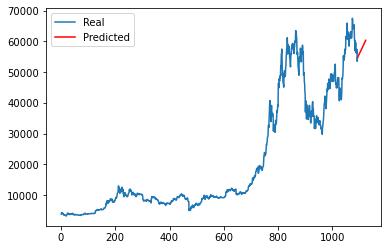

In [774]:
ax = plt.gca()

before.plot(kind='line',y='Data',ax=ax, label="Real")
after.plot(kind='line',y='Data', color='red', ax=ax, label = "Predicted")
plt.savefig('Forecast.png')
plt.show()